In [1]:
%matplotlib inline
import pandas as pd
from prophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('samples/gagok.csv') #, index_col=0, parse_dates=Tru)

In [3]:
df.drop(columns=['pa','pb'],inplace=True)

In [4]:
df = df.rename(columns={'t':'ds', 'level': 'y'})

In [16]:
df['ds'] = pd.DatetimeIndex(df['ds'])
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [17]:
df

,ds,y
0,2019-12-01 00:00:00,69.600
1,2019-12-01 00:01:00,69.900
2,2019-12-01 00:02:00,69.475
3,2019-12-01 00:03:00,69.875
4,2019-12-01 00:04:00,69.900
...,...,...
525585,2020-11-30 23:55:00,66.575
525586,2020-11-30 23:56:00,67.000
525587,2020-11-30 23:57:00,66.675
525588,2020-11-30 23:58:00,66.075


In [18]:
# Whole Period  (2019-12-01 ~ 2020-11-30)
START_DAY = '2020-07-02'
END_DAY = '2020-07-26'

In [19]:
# Prepare data
dfgagok = df.copy(deep=True)

In [26]:
df2 = df[(df.ds>=START_DAY) & (df.ds<END_DAY)]

In [27]:
df2

,ds,y
306714,2020-07-02 00:00:00,60.400
306715,2020-07-02 00:01:00,61.625
306716,2020-07-02 00:02:00,61.225
306717,2020-07-02 00:03:00,61.550
306718,2020-07-02 00:04:00,60.950
...,...,...
341269,2020-07-25 23:55:00,55.550
341270,2020-07-25 23:56:00,55.750
341271,2020-07-25 23:57:00,55.700
341272,2020-07-25 23:58:00,55.750


In [28]:
df2 = df2[::10]

Text(0.5, 1.0, 'Water Level Data')

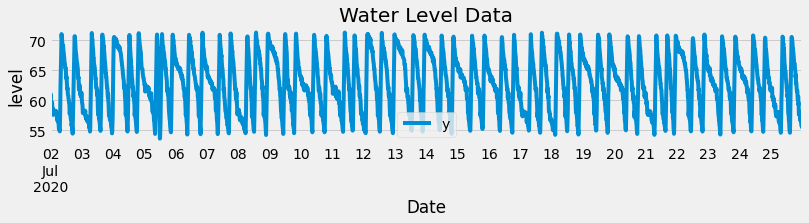

In [29]:
ax = df2.set_index('ds').plot(figsize=(12, 2))
ax.set_ylabel('level')
ax.set_xlabel('Date')
plt.title('Water Level Data')

In [30]:
train = df2[df2.ds<'2020-07-23']

In [31]:
print(train)

                        ds       y
306714 2020-07-02 00:00:00  60.400
306724 2020-07-02 00:10:00  61.075
306734 2020-07-02 00:20:00  60.225
306744 2020-07-02 00:30:00  59.500
306754 2020-07-02 00:40:00  59.625
...                    ...     ...
336904 2020-07-22 23:10:00  65.900
336914 2020-07-22 23:20:00  65.375
336924 2020-07-22 23:30:00  65.775
336934 2020-07-22 23:40:00  65.175
336944 2020-07-22 23:50:00  64.950

[3024 rows x 2 columns]


In [33]:
train.ds.freq='10min'

In [34]:
train.ds

306714   2020-07-02 00:00:00
306724   2020-07-02 00:10:00
306734   2020-07-02 00:20:00
306744   2020-07-02 00:30:00
306754   2020-07-02 00:40:00
                 ...        
336904   2020-07-22 23:10:00
336914   2020-07-22 23:20:00
336924   2020-07-22 23:30:00
336934   2020-07-22 23:40:00
336944   2020-07-22 23:50:00
Name: ds, Length: 3024, dtype: datetime64[ns]

In [36]:
# Train a model
my_model = Prophet(interval_width=0.95, daily_seasonality=True) # set the uncertainty interval to 95% (the Prophet default is 80%)
my_model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.15969


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6748.36   0.000229088       95.2755      0.3693           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       6748.43   0.000222854       172.224   2.784e-06       0.001      202  LS failed, Hessian reset 
     181       6748.47   2.61277e-05       88.9844   2.466e-07       0.001      309  LS failed, Hessian reset 
     199       6748.47   1.45316e-05       72.0184           1           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       6748.47   2.35968e-07       68.5042      0.1738           1      350   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [37]:
# Forecast future data
future_dates = my_model.make_future_dataframe(periods=6*24*3, freq='10min') # (6 times an hour * 24 hours * 3 days)

In [38]:
future_dates

,ds
0,2020-07-02 00:00:00
1,2020-07-02 00:10:00
2,2020-07-02 00:20:00
3,2020-07-02 00:30:00
4,2020-07-02 00:40:00
...,...
3451,2020-07-25 23:10:00
3452,2020-07-25 23:20:00
3453,2020-07-25 23:30:00
3454,2020-07-25 23:40:00


In [39]:
future = future_dates.loc[future_dates['ds']>='2020-07-23 00:00:00']

In [40]:
future

,ds
3024,2020-07-23 00:00:00
3025,2020-07-23 00:10:00
3026,2020-07-23 00:20:00
3027,2020-07-23 00:30:00
3028,2020-07-23 00:40:00
...,...
3451,2020-07-25 23:10:00
3452,2020-07-25 23:20:00
3453,2020-07-25 23:30:00
3454,2020-07-25 23:40:00


In [41]:
forecast = my_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast['yhat-s']=forecast['yhat']
forecast['yhat-s']=((forecast['yhat-s']-forecast['yhat'].mean())*5)+forecast['yhat'].mean()

/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [86]:
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: No module named 'sklearn'

In [42]:
# calculate performance
y_true = df2['y'][-(6*24*3):].values
y_pred = forecast['yhat-s'].values

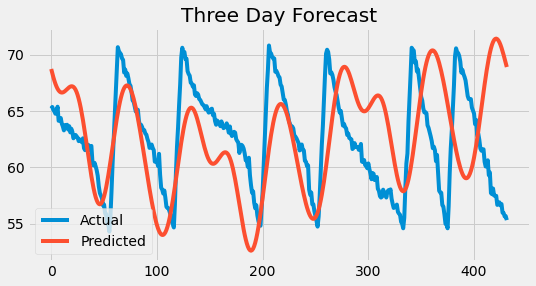

In [43]:
# Draw performance
plt.figure(figsize=(8, 4))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Three Day Forecast')
plt.show()

In [ ]:
# calculate performance
len(forecast)
y_true = df['y'][-432:].values
y_pred = forecast['yhat-s'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

# Draw performance
plt.figure(figsize=(8, 4))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Three Day Forecast')
plt.show()